In [6]:
filenames = []
for purpose in ["training", "validation", "testing"]:
    filelist = f"/geosat2/julaiti/new_features_1130/{purpose}_files_desc.txt"
    with open(filelist) as f:
        filenames += f.readlines()
filenames = [s.strip() for s in filenames if s.strip()]
len(filenames)

8078

In [13]:
valid_regions = ["AGSO", "JAMSTEC", "NGA", "NGDC", "NOAA_geodas", "SIO", "US_multi"]
num_measures = {}
for region in valid_regions:
    num_measures[region] = []

In [15]:
import io

for filename in filenames:
    region = filename.rsplit("/", 2)[1]
    if region not in valid_regions:
        continue
    with io.open(filename, 'r', newline='\n') as fread:
        num_measures[region].append(len(fread.readlines()))

In [16]:
import numpy as np
import pickle

measures_count = []
for region in valid_regions:
    measures_count.append(np.array(num_measures[region]))
with open("measures_count.pkl", "wb") as f:
    pickle.dump(measures_count, f)

In [35]:
measures = np.concatenate(measures_count, axis=0)
measures_count.append(measures)

AGSO & 127 & 15037918 & 0.48
JAMSTEC & 541 & 80524719 & 0.81
NGA & 1374 & 4386491 & 0.92
NGDC & 1033 & 115856458 & 0.69
NOAA_geodas & 4079 & 20451875 & 0.72
SIO & 247 & 20866371 & 0.76
US_multi & 480 & 29543749 & 0.73
all & 7881 & 286667581 & 0.93


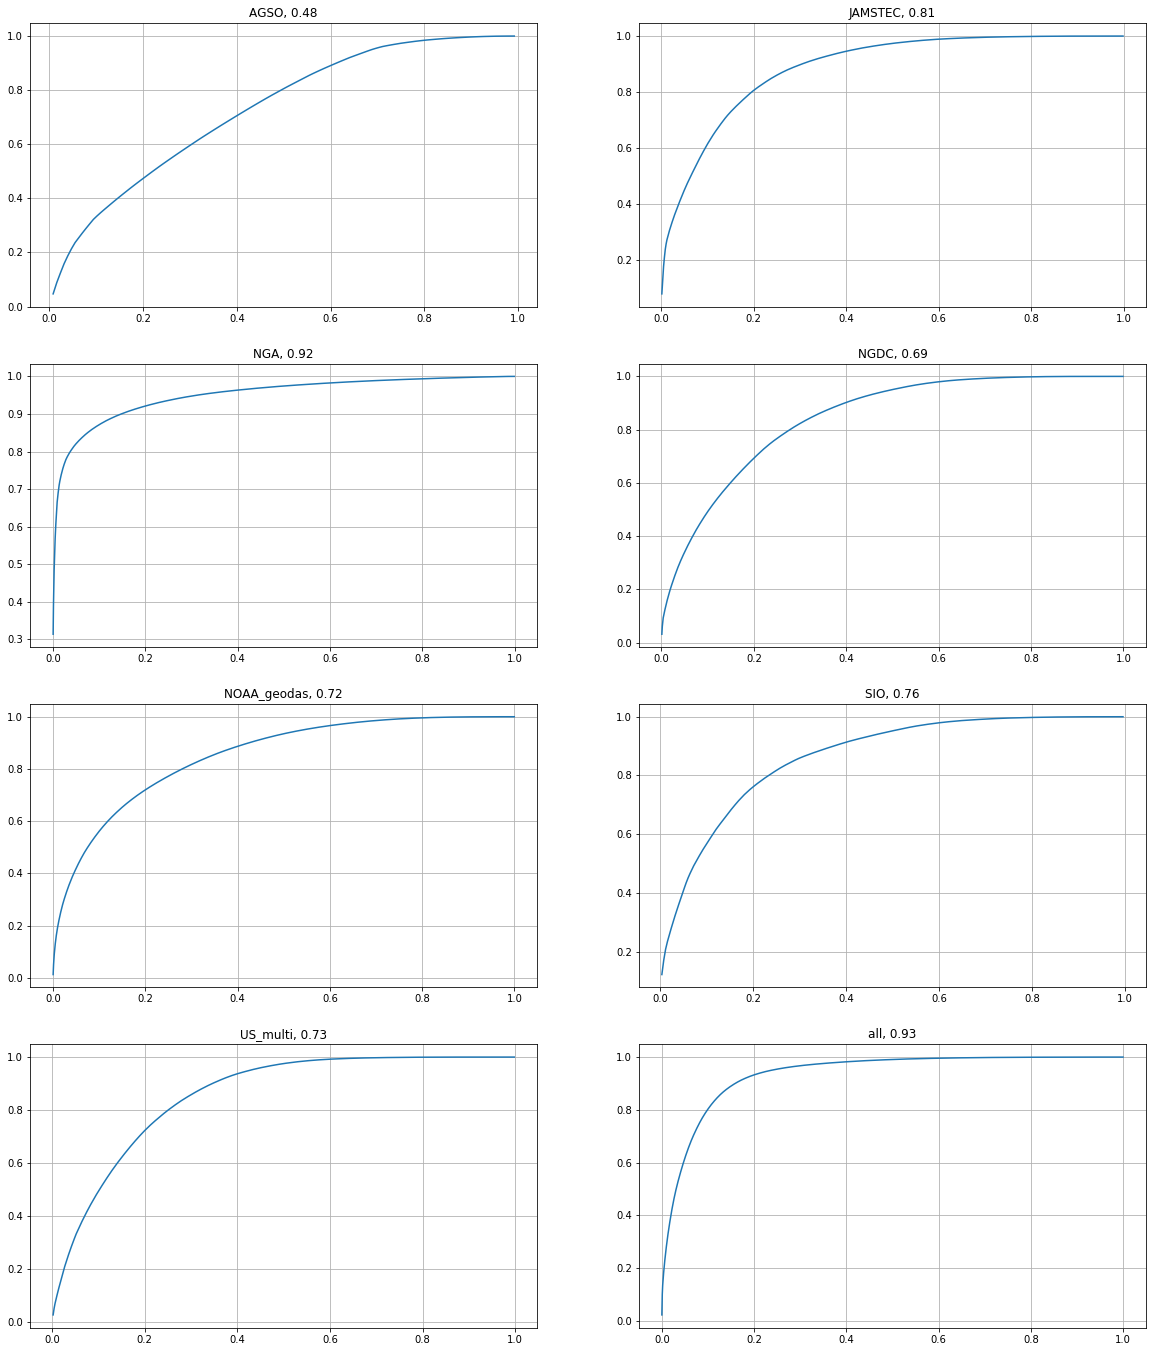

In [43]:
%matplotlib inline

from matplotlib import pyplot as plt

fig, ax = plt.subplots(4, 2, figsize=(10 * 2, 6 * 4))

for i, (region, measures) in enumerate(zip(valid_regions + ["all"], measures_count)):
    total_measures = np.sum(measures)
    measures = np.sort(measures)[::-1]
    portion = 1.0 * np.cumsum(measures) / total_measures

    exceed = portion[int(len(portion) * 0.2)]
    figure = ax[int(i / 2)][i % 2]
    figure.set_title("{}, {:.2f}".format(region, exceed))
    figure.plot(np.arange(1, len(portion) + 1) / (len(portion) + 1), portion)
    figure.grid(True)

    print("{} & {} & {} & {:.2f}".format(region, len(measures), total_measures, exceed))